<a href="https://colab.research.google.com/github/Ganeshwalimbe/Predictive-Modeling-for-Customer-Churn/blob/main/Predictive_Modeling_for_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Predictive Modeling for Customer Churn**

**Objective:**

The objective of this assignment is to build a predictive model that can predict customer churn for a given company. Using machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.


## **Data description:**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Input variables: # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric) 

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [243]:
#importing neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/bank.csv',sep=';')
data=data.drop('duration',axis=1)

In [245]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


In [246]:
data.shape

(4521, 16)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


# **Data cleaning and preprocessing**

In [248]:
#checking if missing values are present in dataset
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**There are no missing values in the dataset**

In [249]:
#checking if duplicates are present
data.duplicated().sum()

0

# **Checking if data is imbalanced**

In [250]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

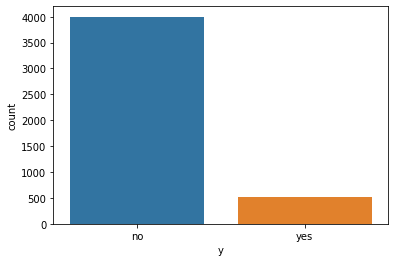

In [251]:
sns.countplot(x='y',data=data)

## **We can see that the dataset is imbalanced .So I am going to use oversampling technique to make the data balanced dataset.**

In [252]:
majority_class=data[data.y=='no']
minority_class=data[data.y=='yes']

In [253]:
majority_class.shape

(4000, 16)

In [254]:
minority_class.shape

(521, 16)

In [255]:
imbalanced_percentage=4000/4520
imbalanced_percentage

0.8849557522123894

In [256]:
y_no_count,y_yes_count=data.y.value_counts()

In [257]:
y_class_yes=minority_class.sample(y_no_count,replace=True)
balanced_data=pd.concat([majority_class,y_class_yes],axis=0)

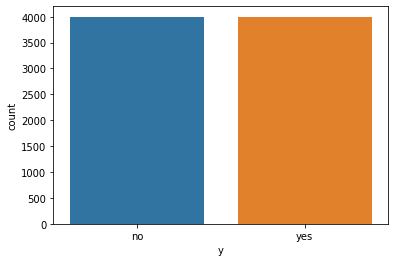

In [258]:
sns.countplot(x='y',data=balanced_data)

## **Now the dataset looks balanced so we can proceed further**

In [259]:
balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no


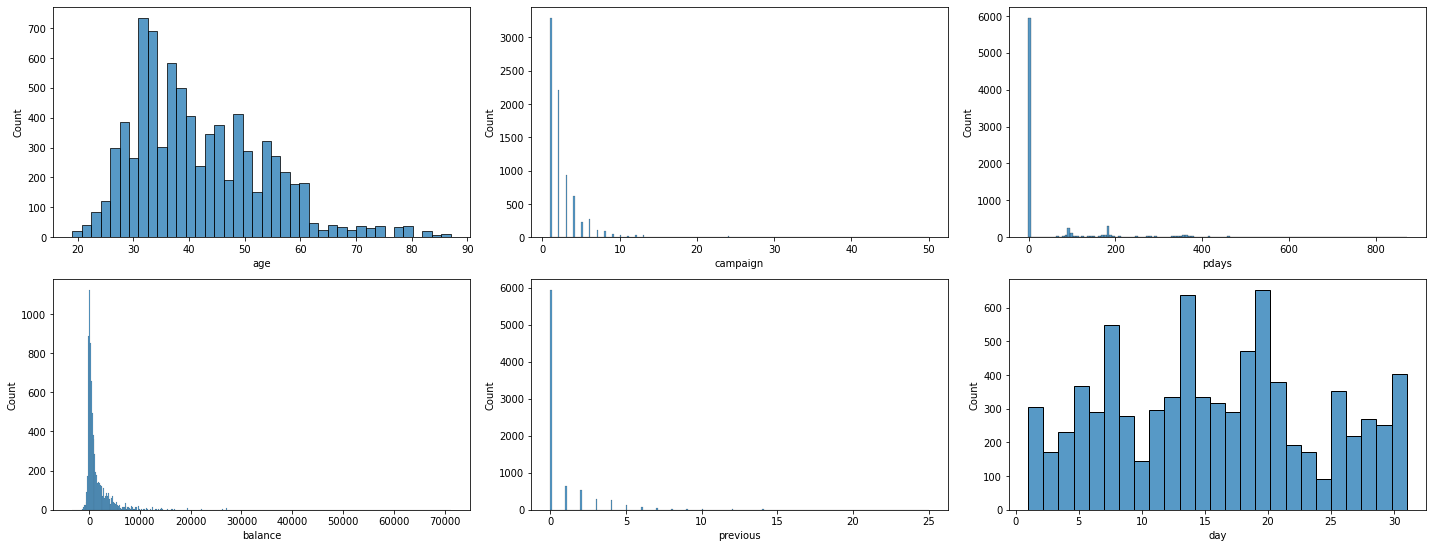

In [260]:
numerical_variables = ['age','campaign','pdays','balance','previous','day']
#plotting histogram of all the numerical variables
fig=plt.figure(figsize=(20,30))

for i in range(len(numerical_variables)):
    fig.add_subplot(8, 3, i+1)
    
    sns.histplot(balanced_data[numerical_variables[i]])
plt.tight_layout()
plt.show()

## **We can see that the data is not evenly distributed, therefore we need to standardize**

## **Convering categorical variables to numerical variables**

In [261]:
#convering categorical variables to numerical variables
balanced_data['poutcome'] = balanced_data['poutcome'].map({'failure': -1,'unknown': 0,'success': 1})
balanced_data['default'] = balanced_data['default'].map({'yes': -1,'unknown': 0,'no': 1})
balanced_data['housing'] = balanced_data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
balanced_data['loan'] = balanced_data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [262]:
balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,1,-1,0,0.0,no
1,33,services,married,secondary,1,4789,-1,-1,cellular,11,may,1,339,4,-1.0,no
2,35,management,single,tertiary,1,1350,-1,1,cellular,16,apr,1,330,1,-1.0,no
3,30,management,married,tertiary,1,1476,-1,-1,unknown,3,jun,4,-1,0,0.0,no
4,59,blue-collar,married,secondary,1,0,-1,1,unknown,5,may,1,-1,0,0.0,no


In [263]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month']
processed_data = pd.get_dummies(balanced_data,columns=nominal)
processed_data['y']=processed_data['y'].map({'yes': 1,'no': 0})
processed_data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,1787,1,1,19,1,-1,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,-1,-1,11,1,339,4,-1.0,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,-1,1,16,1,330,1,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,30,1,1476,-1,-1,3,4,-1,0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,59,1,0,-1,1,5,1,-1,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [264]:
processed_data.shape

(8000, 45)

In [265]:
numerical_index=[0,2,5,6,8]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
processed_data[processed_data.columns[numerical_index]] = scaler.fit_transform(processed_data[processed_data.columns[numerical_index]])

In [266]:
processed_data.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,poutcome,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.161765,1,0.068455,1,1,0.600000,0.000000,-1,0.00,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.205882,1,0.108750,-1,-1,0.333333,0.000000,339,0.16,-1.0,...,0,0,0,0,0,0,1,0,0,0
2,0.235294,1,0.062590,-1,1,0.500000,0.000000,330,0.04,-1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,1,0.064281,-1,-1,0.066667,0.061224,-1,0.00,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.588235,1,0.044469,-1,1,0.133333,0.000000,-1,0.00,0.0,...,0,0,0,0,0,0,1,0,0,0


In [267]:
processed_data.shape

(8000, 45)

In [268]:
processed_data.isnull().sum()

age                      0
default                  0
balance                  0
housing                  0
loan                     0
day                      0
campaign                 0
pdays                    0
previous                 0
poutcome               464
y                        0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
marital_divorced         0
marital_married          0
marital_single           0
education_primary        0
education_secondary      0
education_tertiary       0
education_unknown        0
contact_cellular         0
contact_telephone        0
contact_unknown          0
month_apr                0
month_aug                0
month_dec                0
month_feb                0
m

In [269]:
processed_data=processed_data.dropna()

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [271]:
x=processed_data.drop('y',axis=1)
y=processed_data.y.values

In [272]:
type(x['age'])

pandas.core.series.Series

**Splitting the dataset into training and testing dataset**

In [273]:
x_train, x_test , y_train, y_test = train_test_split(x, y , train_size=0.75,test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(5652, 44)
(1884, 44)


## **Feature selection using Mutual Information**
Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.


In [274]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.02596401, 0.        , 0.31986832, 0.01356178, 0.00036722,
       0.01766452, 0.01507803, 0.0922694 , 0.02931811, 0.04705722,
       0.        , 0.00654084, 0.00253924, 0.        , 0.        ,
       0.00803875, 0.00377453, 0.00079289, 0.00847308, 0.00430719,
       0.0080768 , 0.00075574, 0.        , 0.        , 0.00260992,
       0.00519506, 0.00426322, 0.        , 0.00823054, 0.01600757,
       0.        , 0.0202547 , 0.01632301, 0.        , 0.        ,
       0.01050702, 0.00577854, 0.        , 0.0049036 , 0.00540264,
       0.01041147, 0.00768304, 0.00445039, 0.        ])

In [275]:
from sklearn.feature_selection import SelectKBest

In [276]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False).head(15)

balance              0.319868
pdays                0.092269
poutcome             0.047057
previous             0.029318
age                  0.025964
contact_unknown      0.020255
day                  0.017665
month_apr            0.016323
contact_cellular     0.016008
campaign             0.015078
housing              0.013562
month_feb            0.010507
month_may            0.010411
job_student          0.008473
education_unknown    0.008231
dtype: float64

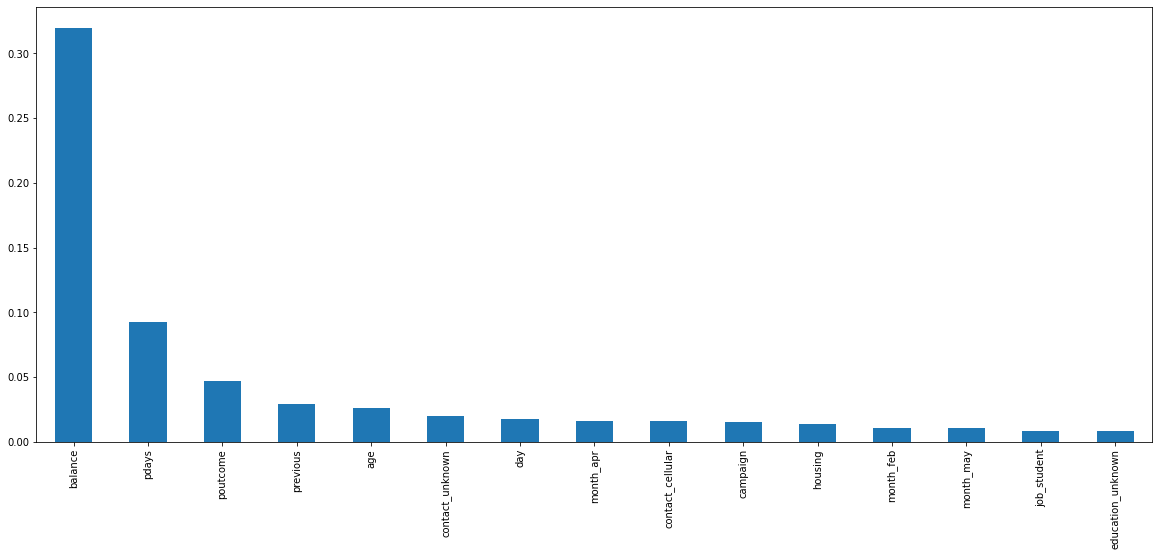

In [277]:
mutual_info.sort_values(ascending=False).head(15).plot.bar(figsize=(20, 8))

In [278]:
def select_features(x_train, y_train, x_test):

 # configure to select 15 best features
 fs = SelectKBest(score_func=mutual_info_classif, k=15)
 # learn relationship from training data
 fs.fit(x_train, y_train)
 # transform train input data
 x_train_fs = fs.transform(x_train)
 # transform test input data
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs

In [279]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

In [280]:
x_train_fs.shape

(5652, 15)

In [281]:
x_train_fs

array([[ 0.26470588,  0.0453551 ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.04573093,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39705882,  0.04477792,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.35294118,  0.02884525, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22058824,  0.0487376 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45588235,  0.04527456, -1.        , ...,  0.        ,
         0.        ,  0.        ]])

# **Logistic regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [282]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression(fit_intercept=True, max_iter=10000)
logistic.fit(x_train_fs, y_train)

LogisticRegression(max_iter=10000)

In [283]:
# Get the predicted classes
train_class_preds = logistic.predict(x_train_fs)
test_class_preds = logistic.predict(x_test_fs)

In [284]:
#importing packeges for evaaluation of model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn import metrics

## **Evaluation metrics of classification models**

**Accuracy** : Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number

**Precision** : Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

**Recall** :  Recall explains how many of the actual positive cases we were able to predict correctly with our model

**F1 score** : It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall

**AUC ROC**: The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes.

In [285]:
#defining function to find the training and testing accuracy 
def print_testing_accuracy(actual,predicted):
  print('Testing accuracy  is {}'.format(accuracy_score(actual, predicted)))
  print('precision is {}'.format(metrics.precision_score(actual,predicted)))
  print('Recall is {}'.format(metrics.recall_score(actual,predicted)))
  print('F1 score is {}'.format(metrics.f1_score(actual,predicted)))


In [286]:
#getting evaluation metrics of logisic regression 
print_testing_accuracy(test_class_preds,y_test)

Testing accuracy  is 0.6523354564755839
precision is 0.6561135371179039
Recall is 0.638682252922423
F1 score is 0.6472805600430802


In [287]:
#evaluation metrics of logistic regression
print(metrics.classification_report(train_class_preds, y_train))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      2863
           1       0.65      0.65      0.65      2789

    accuracy                           0.66      5652
   macro avg       0.66      0.66      0.66      5652
weighted avg       0.66      0.66      0.66      5652



In [288]:
#evaluation metrics of logistic regression
print(metrics.classification_report(test_class_preds, y_test))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       943
           1       0.66      0.64      0.65       941

    accuracy                           0.65      1884
   macro avg       0.65      0.65      0.65      1884
weighted avg       0.65      0.65      0.65      1884



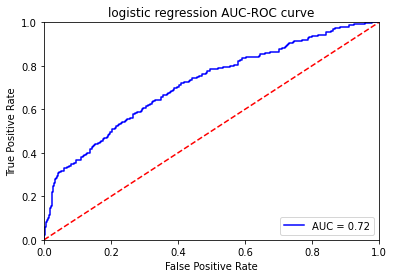

In [289]:
#plotting AUC ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic.predict_proba(x_test_fs)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic regression without hyperparameter tunning giving us testing accuracy of 64% to predict customer churn**

# **Logistic regression (hyperparameter tunning)**

In [290]:
#performing hyperparameter tunning on logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
logit= LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logit, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_fs, y_train)

In [291]:
#getting predicted values of y train and y test
y_pred_train_lr_ht=grid_search.predict(x_train_fs)
y_pred_test_lr_ht=grid_search.predict(x_test_fs)

In [292]:
#getting evaluation metrics of logistic regression after hyperparameter tunning
print_testing_accuracy(y_pred_test_lr_ht,y_test)

Testing accuracy  is 0.6539278131634819
precision is 0.6593886462882096
Recall is 0.6398305084745762
F1 score is 0.6494623655913978


In [293]:
#evaluation metrics of logistic regression
print(metrics.classification_report(y_pred_test_lr_ht, y_test))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       940
           1       0.66      0.64      0.65       944

    accuracy                           0.65      1884
   macro avg       0.65      0.65      0.65      1884
weighted avg       0.65      0.65      0.65      1884



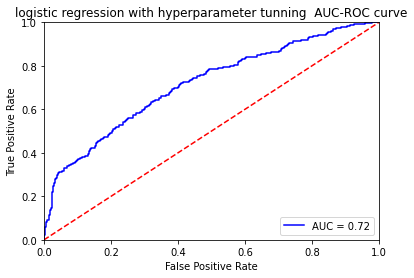

In [294]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search.predict_proba(x_test_fs)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('logistic regression with hyperparameter tunning  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Logistic regression after hyperparameter tunning is giving testing accuracy of 65% to predict customer churn**

# **Gradient Boosting**
Gradient Boosting Machine (GBM) is one of the most popular forward learning ensemble methods in machine learning. It is a powerful technique for building predictive models for regression and classification tasks.

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train_fs,y_train)

GradientBoostingClassifier()

In [296]:
#getting predicted values of y train and y test
train_preds_gb =  gb_classifier.predict(x_train_fs)
test_preds_gb  = gb_classifier.predict(x_test_fs)

In [297]:
#getting evaluation metrics of gradient boosting
print_testing_accuracy(test_preds_gb,y_test)

Testing accuracy  is 0.7377919320594479
precision is 0.6997816593886463
Recall is 0.7453488372093023
F1 score is 0.7218468468468469


In [298]:
#gradient boosting evaluation metrics 
print(metrics.classification_report(train_preds_gb, y_train))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3167
           1       0.71      0.79      0.75      2485

    accuracy                           0.76      5652
   macro avg       0.76      0.77      0.76      5652
weighted avg       0.77      0.76      0.76      5652



In [299]:
#gradient boosting evaluation metrics 
print(metrics.classification_report(test_preds_gb, y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1024
           1       0.70      0.75      0.72       860

    accuracy                           0.74      1884
   macro avg       0.74      0.74      0.74      1884
weighted avg       0.74      0.74      0.74      1884



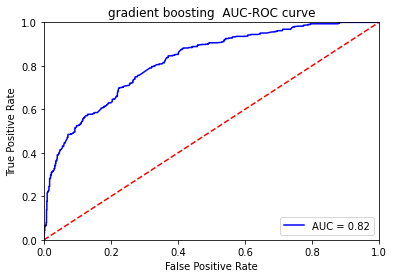

In [300]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gb_classifier.predict_proba(x_test_fs)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('gradient boosting  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Gradient boosting algorithm has given testing accuracy of 74% to predict the customer churn.**

# **Random forest classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time

In [301]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [302]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(x_train_fs, y_train)

RandomForestClassifier()

In [303]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(x_train_fs)
test_preds_rf  = rf.predict(x_test_fs)

In [304]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(train_preds_rf, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2869
           1       1.00      1.00      1.00      2783

    accuracy                           1.00      5652
   macro avg       1.00      1.00      1.00      5652
weighted avg       1.00      1.00      1.00      5652



In [305]:
#random forest classifier evaluation metrics 
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       904
           1       0.99      0.93      0.96       980

    accuracy                           0.96      1884
   macro avg       0.96      0.96      0.96      1884
weighted avg       0.96      0.96      0.96      1884



In [306]:
#getting evaluation metrics of random forest classifier
print_testing_accuracy(test_preds_rf,y_test)

Testing accuracy  is 0.9575371549893843
precision is 0.9912663755458515
Recall is 0.926530612244898
F1 score is 0.9578059071729957


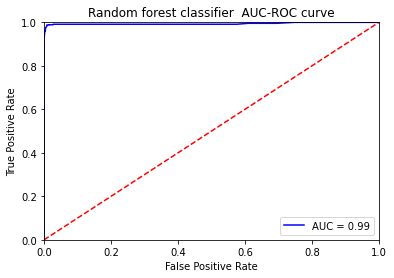

In [307]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(x_test_fs)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Random forest classifier  AUC-ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Random forest model has given testing accuracy of 98% to predict customer churn**

# **Summary:**
**Prediction models observations**

1.  Among all the prediction models Random forest model has given highest accuracy of 98 % to predict customer churn.
therefore we can use random forest model for the prediction of customer churn.

**The limitations of using a Random Forest model to predict customer churn are:**
1. Random Forest models are prone to overfitting, which can lead to inaccurate predictions. 
2. Random Forest models are computationally expensive and require a lot of time to train and test. 
3. Random Forest models are difficult to interpret, as the resulting decision trees are often very complex and hard to understand. 

**To overcome these limitations, future work could include:**

 Exploring alternative models such as Support Vector Machines, Neural Networks, and Ensemble models. Additionally, feature selection and regularization techniques could be used to reduce overfitting and improve accuracy. Finally, data visualization techniques could be used to gain a better understanding of the data and the resulting decision trees.
